# K-means clustering from scratch

In [53]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import k_means

1. Let's generate some data

In [14]:
centers = [[1, 1], [-1, -1], [1, -1]]
data, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

data = StandardScaler().fit_transform(data)

2. Let's write a function to handle missing values

In [17]:
# Handle missing values by replacing them with column medians

# Assuming 'data' is a 2D NumPy array
num_columns = data.shape[1]

for i in range(num_columns):
    column = data[:, i]
    
    # Filter out NaN values for median calculation
    non_nan_column = column[~np.isnan(column)]
    
    # Calculate the median using NumPy's built-in function
    median_value = np.median(non_nan_column)
    
    # Replace NaN values with the computed median
    column[np.isnan(column)] = median_value

    # Update the data array with the modified column
    data[:, i] = column

In [18]:
print(data)

[[ 0.49426097  1.45106697]
 [-1.42808099 -0.83706377]
 [ 0.33855918  1.03875871]
 ...
 [-0.05713876 -0.90926105]
 [-1.16939407  0.03959692]
 [ 0.26322951 -0.92649949]]


3. Initialize the cluster centroids

In [57]:
# Set the number of clusters (K)
K = 3

# Assuming 'data' is a 2D NumPy array
min_values = np.min(data, axis=0)
max_values = np.max(data, axis=0)

# Initialize centroids randomly between the minimum and maximum values of each column
initial_centroids = np.random.rand(K, data.shape[1]) * (max_values - min_values) + min_values


4. Plot the data and the original cluster centroids

/var/folders/bx/z6474k1x4hl7tmn54rd53x3m0000gn/T/ipykernel_75689/2740155191.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:, 0], data[:, 1],  s=50, cmap='viridis', marker='o')


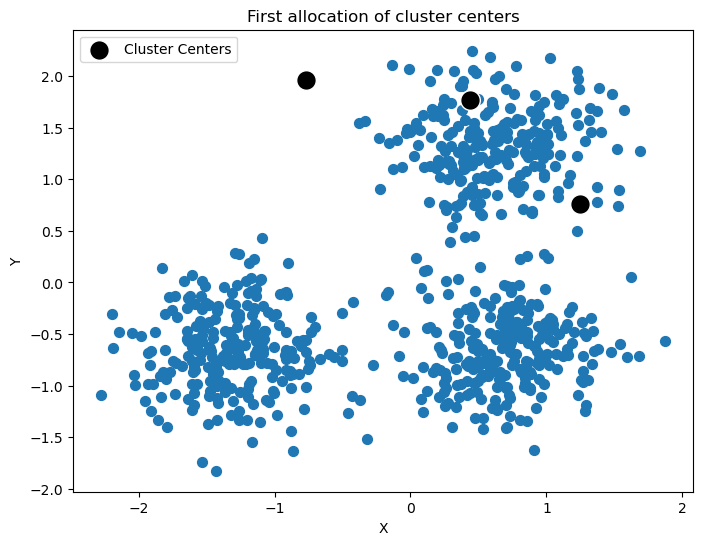

In [59]:
plt.figure(figsize=(8, 6))
# Scatter plot of data points, colored by their cluster
plt.scatter(data[:, 0], data[:, 1],  s=50, cmap='viridis', marker='o')

# Scatter plot for cluster centers
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], c='k', s=200, label='Cluster Centers', edgecolor='white')

# Add title, labels, and legend
plt.title('First allocation of cluster centers')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Display the plot
plt.show()

5. Run the clustering algorithm


Recipe:

1. Initiate centroids
2. Calculate distance of all data points to each centroid
3. Assign each data point to closest centroid
4. Calculate new centroid
5. Repeat 2-4

In [49]:
# K-means parameters
max_iterations = 300
tolerance = 1e-4

# Function to calculate Euclidean distance
def calculate_euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# K-means clustering algorithm
for iter in range(max_iterations):
    # Assignment step: Calculate the distances and assign clusters
    distances = np.zeros((data.shape[0], K))
    
    for i in range(data.shape[0]):
        for j in range(K):
            distances[i, j] = calculate_euclidean_distance(data[i, :], initial_centroids[j, :])
    
    # Get the index of the nearest centroid for each data point
    cluster_indices = np.argmin(distances, axis=1)
    
    # Update centroids
    new_centroids = np.zeros_like(initial_centroids)
    
    for i in range(K):
        # Get all points assigned to cluster i
        cluster_points = data[cluster_indices == i, :]
        
        if len(cluster_points) > 0:
            new_centroids[i, :] = np.mean(cluster_points, axis=0)
        else:
            # Reinitialize the centroid randomly if no points are assigned
            new_centroids[i, :] = np.random.rand(1, data.shape[1]) * (max_values - min_values) + min_values
    
    # Check for convergence
    if np.max(np.abs(new_centroids - initial_centroids)) <= tolerance:
        break
    
    # Update centroids for the next iteration
    initial_centroids = new_centroids


6. Plot results

Final Centroids:
[[ 0.6954587  -0.64442334]
 [-1.30266211 -0.65704205]
 [ 0.62260555  1.3172598 ]]
Cluster Number   Number of Data Points
1               250
2               252
3               248


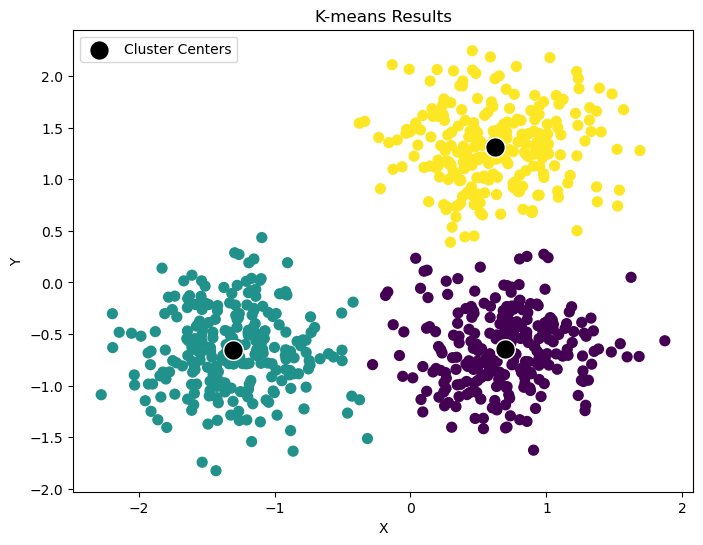

In [50]:
# Display the final centroids
print("Final Centroids:")
print(initial_centroids)

# Count the number of data points in each cluster
num_points_in_clusters = np.bincount(cluster_indices, minlength=K)

# Print results
print("Cluster Number   Number of Data Points")
for i in range(K):
    print(f"{i+1}               {num_points_in_clusters[i]}")

# Visualize data points and cluster centers
plt.figure(figsize=(8, 6))
# Scatter plot of data points, colored by their cluster
plt.scatter(data[:, 0], data[:, 1], c=cluster_indices, s=50, cmap='viridis', marker='o')

# Scatter plot for cluster centers
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], c='k', s=200, label='Cluster Centers', edgecolor='white')

# Add title, labels, and legend
plt.title('K-means Results')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Display the plot
plt.show()


# Clustering using scikit learn

We do the same k-means clustering analysis using scikit learn.

1. Execute the algorithm:

In [60]:
centroid, label, inertia = k_means(
    data, n_clusters=3, n_init="auto", random_state=0
)

2. Look at the centroids

In [61]:
centroid

array([[-1.30266211, -0.65704205],
       [ 0.62260555,  1.3172598 ],
       [ 0.6954587 , -0.64442334]])

3. Evaluate  the best cluster fit (using the elbow method)

A "downside" of clustering is that it will always return the number of clusters that we specify. One solution is to try different numbers of clusters and evaluate the "inertia" (the sum of differences from each point to the corresponding cluster center, summing across all clusters)

In [66]:
elbow = list() # list to store interias
for k in range(9):
    centroid, label, inertia = k_means(
            data, n_clusters=k+1, n_init="auto", random_state=0
    )
    elbow.append(inertia)

4. Generate elbow plot

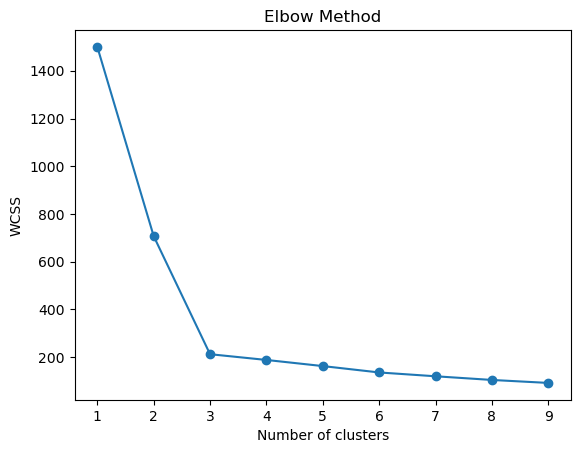

In [67]:
plt.plot(range(1, 10), elbow, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# More sophisticated models using sci-kit learn

Sklearn provides access to a variety of clustering algorithms

1. MiniBatch K-Means
- How it Works: MiniBatch K-Means is a variant of K-Means that uses small random batches of the data to perform clustering updates, making it faster and more memory-efficient than regular K-Means.
- Mechanism: The algorithm randomly samples small batches of data points in each iteration, computes cluster assignments, and updates centroids based on the sample.
- Use Case: Best for clustering large datasets where traditional K-Means would be too slow or memory-intensive.

2. Affinity Propagation
- How it Works: Affinity Propagation doesn’t require a predefined number of clusters. Instead, it uses a similarity matrix to identify exemplars (representative points for each cluster).
- Mechanism: Points communicate through "messages" in a matrix until they converge on exemplars, using parameters like damping and preference to adjust message influence and cluster count.
- Use Case: Suitable for data with well-defined clusters where the number of clusters isn’t known beforehand, but computationally intensive on large datasets.
3. MeanShift
- How it Works: MeanShift clusters points by iteratively moving towards the densest regions, identifying clusters as peaks in data density.
- Mechanism: The bandwidth parameter controls the neighborhood size. Points are pulled towards their local density center, and clusters form around these peaks.
- Use Case: Good for finding arbitrarily shaped clusters without needing to set a fixed number of clusters, but slow with high-dimensional data.
4. Spectral Clustering
- How it Works: Spectral Clustering applies eigenvalue decomposition to a similarity matrix to reduce dimensions and enhance separability before applying clustering.
- Mechanism: Constructs a similarity (affinity) matrix of the data, reduces dimensions with eigenvectors, and clusters the data based on these new dimensions.
- Use Case: Suitable for data with complex, non-convex shapes but computationally expensive on large datasets due to matrix decomposition.
5. Ward’s Agglomerative Clustering
- How it Works: Ward’s method is a hierarchical clustering approach that starts with each data point as its own cluster, then merges pairs of clusters to minimize variance.
- Mechanism: The algorithm iteratively merges clusters to minimize the within-cluster variance, based on linkage (distance between clusters).
- Use Case: Works well with small to medium-sized datasets where clusters have a clear hierarchy; not ideal for very large datasets due to high computational complexity.
6. Agglomerative Clustering (Average Linkage)
- How it Works: Another hierarchical approach, it merges clusters based on average linkage, which minimizes the average pairwise distance between clusters.
- Mechanism: Begins with each data point in its own cluster, then iteratively merges clusters based on the average distance between all pairs of points in different clusters.
- Use Case: Useful for hierarchical clustering when clusters are of varying sizes or non-convex shapes.
7. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
- How it Works: DBSCAN forms clusters based on the density of points, where points in dense regions are considered part of the same cluster, and outliers are marked separately.
- Mechanism: Uses two parameters, eps (maximum distance between points) and min_samples (minimum number of points in a neighborhood), to form clusters based on point density.
- Use Case: Effective for identifying clusters of varying shapes and sizes with noise/outliers, especially in spatial data.
8. OPTICS (Ordering Points To Identify the Clustering Structure)
- How it Works: OPTICS is similar to DBSCAN but more flexible in finding clusters with varying densities by generating an ordering of points and cluster reachability distances.
- Mechanism: Unlike DBSCAN, it doesn’t produce explicit clusters initially but instead creates an ordered list of points with reachability distances that can later be clustered based on density.
- Use Case: Useful for data with clusters of varying density, as it can adaptively adjust for different densities and still handle noise well.
9. BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)
- How it Works: BIRCH builds a tree structure of data points, clustering as it builds, making it efficient for large datasets.
- Mechanism: Uses a tree structure called a Clustering Feature Tree to incrementally cluster incoming points based on a predefined threshold for cluster compactness.
- Use Case: Ideal for large datasets where a single pass through the data is beneficial, but may struggle with clusters of varying densities.
10. Gaussian Mixture Model (GMM)
- How it Works: GMM assumes that the data is generated from a mixture of Gaussian distributions and uses Expectation-Maximization (EM) to estimate the parameters.
- Mechanism: GMM represents clusters as Gaussian distributions and iteratively refines cluster assignments by maximizing likelihood, allowing for flexible cluster shapes.
- Use Case: Best for data that roughly follows a Gaussian distribution; works well on data where clusters may overlap but can be slow on large datasets.




| Algorithm               | Main Idea                                | Shape of Clusters               | Optimal Use Case                                 |
|-------------------------|------------------------------------------|---------------------------------|-------------------------------------------------|
| **MiniBatch K-Means**   | Fast K-means for large datasets         | Spherical                       | Large datasets needing fast clustering          |
| **Affinity Propagation**| Message-passing clustering              | Arbitrary                       | Unknown cluster count, smaller datasets         |
| **MeanShift**           | Density peak clustering                 | Arbitrary                       | Non-parametric clustering for complex shapes    |
| **Spectral Clustering** | Eigen-decomposition + clustering        | Non-convex                      | Complex, non-convex clusters                    |
| **Ward’s Agglomerative**| Hierarchical clustering by variance     | Hierarchical, generally convex  | Small, hierarchical data                        |
| **Average Linkage**     | Hierarchical by average linkage         | Hierarchical                    | Varied shapes with hierarchical clusters        |
| **DBSCAN**              | Density-based clustering                | Arbitrary                       | Clusters with noise, varying shapes             |
| **OPTICS**              | Density-based, adaptive to density      | Arbitrary                       | Clusters with varying densities                 |
| **BIRCH**               | Tree-based clustering for large data    | Generally convex                | Large datasets needing efficient clustering     |
| **Gaussian Mixture**    | Probabilistic, Gaussian distribution    | Elliptical or spherical         | Overlapping clusters with Gaussian assumptions  |


In [68]:
import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler


In [69]:

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)



/Users/johannabayer/anaconda3/envs/ML_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/johannabayer/anaconda3/envs/ML_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/johannabayer/anaconda3/envs/ML_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/johannabayer/anaconda3/envs/ML_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` 

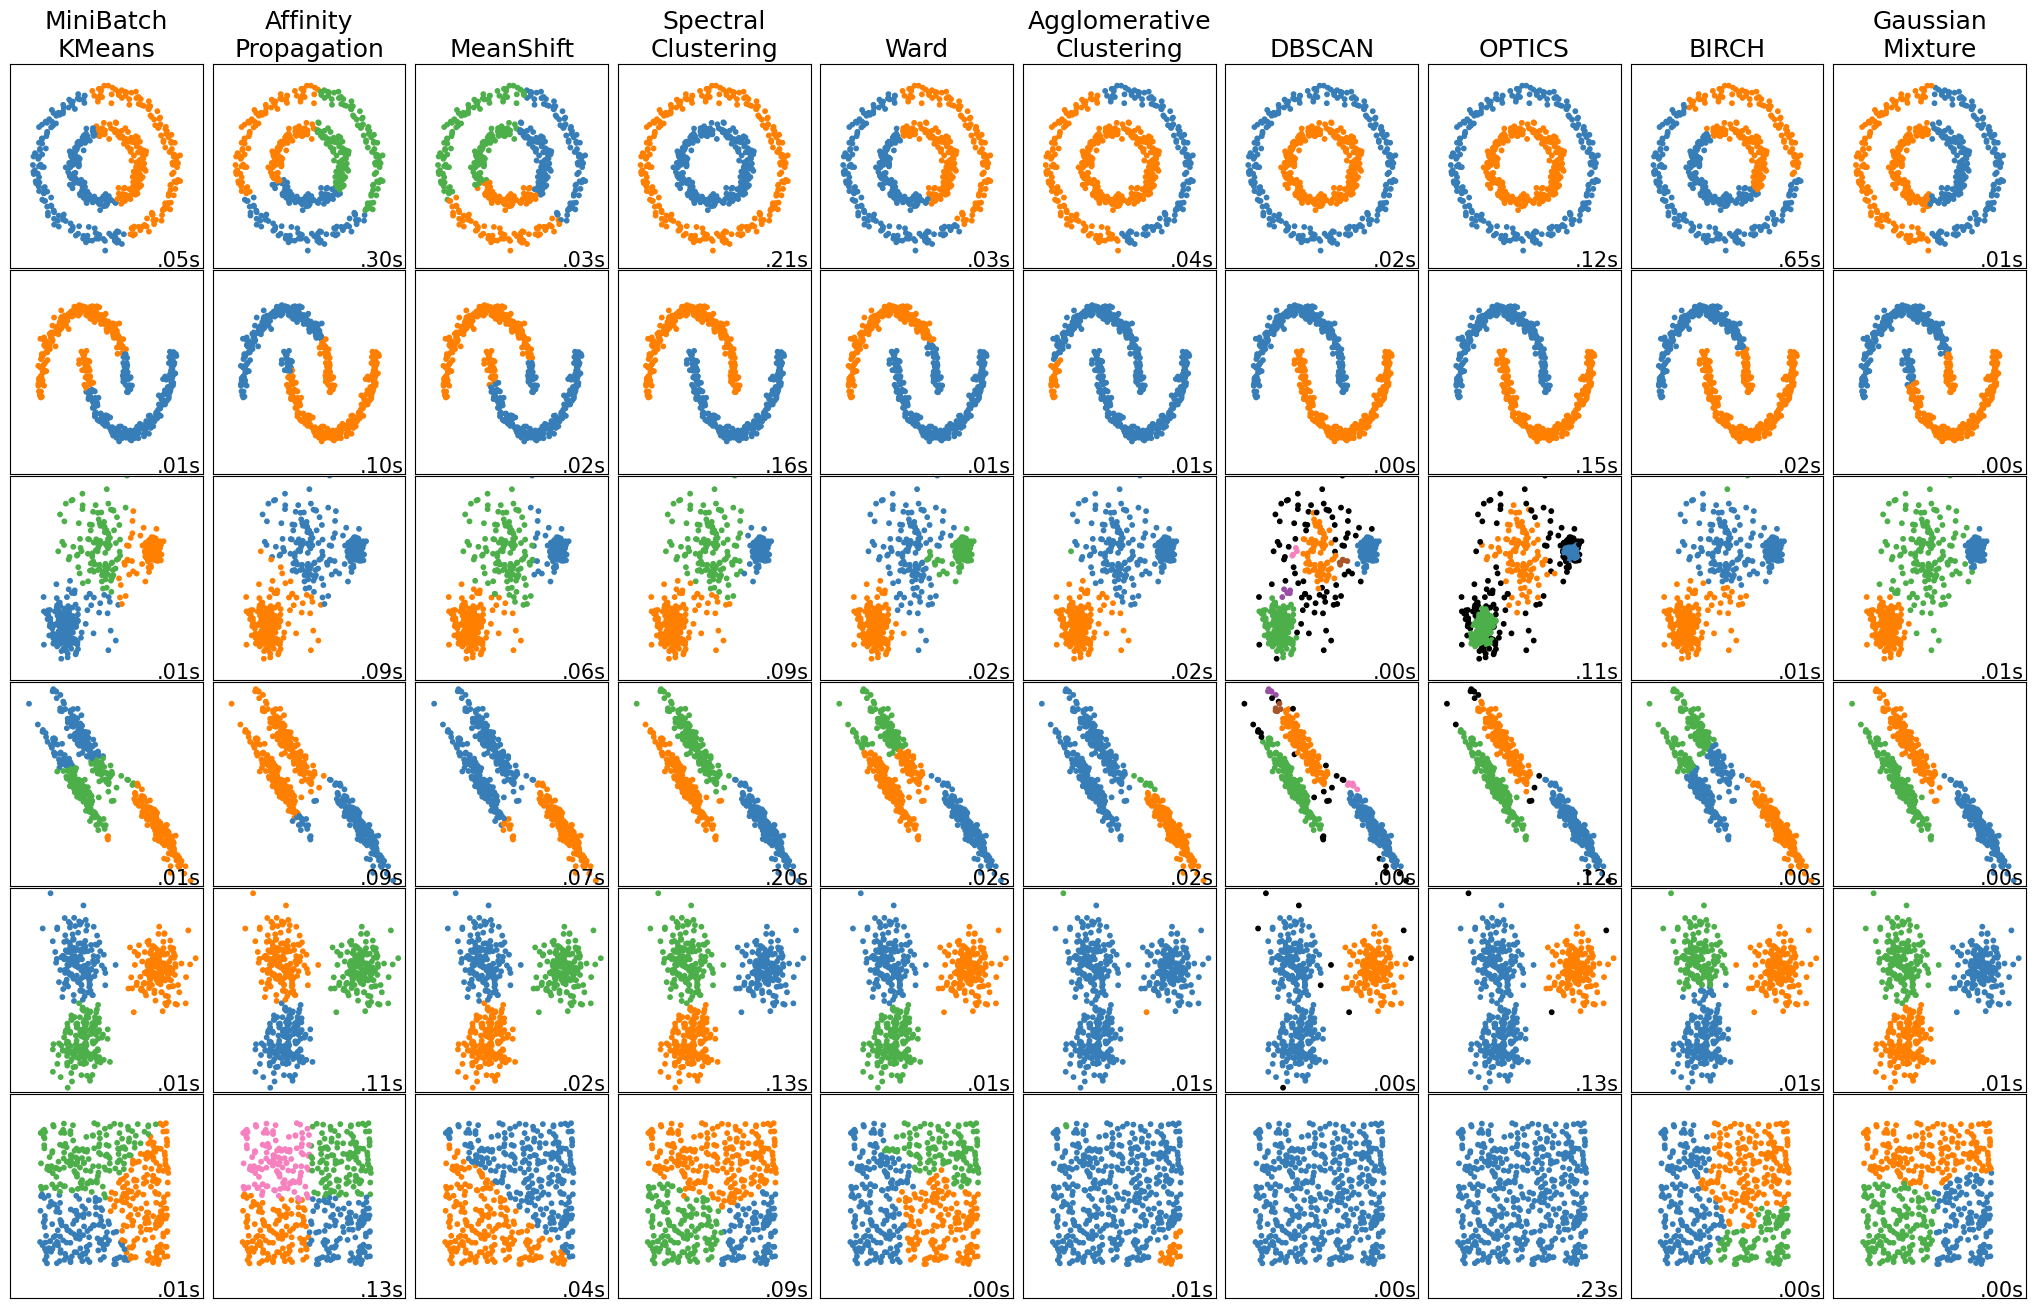

In [71]:
# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
    "allow_single_cluster": True,
    "hdbscan_min_cluster_size": 15,
    "hdbscan_min_samples": 3,
    "random_state": 42,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),
    (
        noisy_moons,
        {
            "damping": 0.75,
            "preference": -220,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.1,
        },
    ),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.01,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(
        n_clusters=params["n_clusters"],
        random_state=params["random_state"],
    )
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )
    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=params["random_state"],
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    #hdbscan = cluster.HDBSCAN(
    #    min_samples=params["hdbscan_min_samples"],
    #    min_cluster_size=params["hdbscan_min_cluster_size"],
    #    allow_single_cluster=params["allow_single_cluster"],
    #)
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"],
        preference=params["preference"],
        random_state=params["random_state"],
    )
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        metric="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    birch = cluster.Birch(n_clusters=params["n_clusters"])
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"],
        covariance_type="full",
        random_state=params["random_state"],
    )

    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("Affinity\nPropagation", affinity_propagation),
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("DBSCAN", dbscan),
        #("HDBSCAN", hdbscan),
        ("OPTICS", optics),
        ("BIRCH", birch),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()